/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 48s 54ms/step - accuracy: 0.8718 - loss: 0.4252 - val_accuracy: 0.9807 - val_loss: 0.0662
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 81s 53ms/step - accuracy: 0.9833 - loss: 0.0560 - val_accuracy: 0.9832 - val_loss: 0.0627
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 82s 53ms/step - accuracy: 0.9872 - loss: 0.0411 - val_accuracy: 0.9892 - val_loss: 0.0445
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 82s 54ms/step - accuracy: 0.9917 - loss: 0.0281 - val_accuracy: 0.9888 - val_loss: 0.0399
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 46s 54ms/step - accuracy: 0.9935 - loss: 0.0211 - val_accuracy: 0.9898 - val_loss: 0.0406
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9858 - loss: 0.0390

✅ Test Accuracy: 0.9902


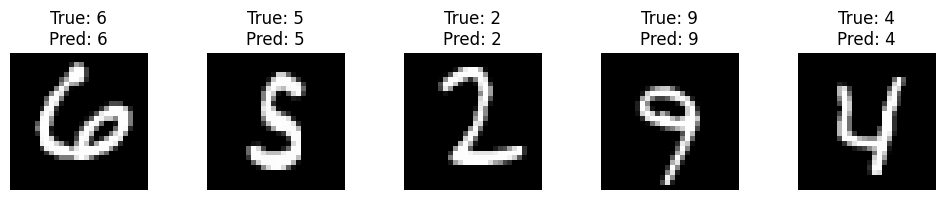

In [3]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Load and preprocess data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the data
x_train = x_train.astype('float32') / 255.0
x_test  = x_test.astype('float32') / 255.0

# Reshape for CNN input: (samples, height, width, channels)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test  = x_test.reshape(-1, 28, 28, 1)
y_train = to_categorical(y_train)
y_test  = to_categorical(y_test)

# Build CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 classes for digits 0-9
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.1)

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'\n✅ Test Accuracy: {test_acc:.4f}')

# Visualize predictions on 5 random test images
num_images = 5
indices = np.random.choice(len(x_test), num_images, replace=False)

plt.figure(figsize=(10, 2))
for i, idx in enumerate(indices):
    img = x_test[idx]
    true_label = np.argmax(y_test[idx])
    pred_label = np.argmax(model.predict(img.reshape(1, 28, 28, 1), verbose=0))

    plt.subplot(1, num_images, i + 1)
    plt.imshow(img.squeeze(), cmap='gray')
    plt.title(f"True: {true_label}\nPred: {pred_label}")
    plt.axis('off')
plt.tight_layout()
plt.show()
